In [1]:
import matplotlib.pyplot 
import numpy as np
import pylab
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import geopandas as gpd
from shapely.geometry import *
from geopandas.geoseries import *
from geopandas import GeoDataFrame
from shapely.geometry import Point
import fiona
import seaborn as sns
import statsmodels.api as sm
import pandas as pd 
import numpy as np 
#Stats 
from sklearn import linear_model 
from scipy.stats import spearmanr
from scipy.stats import sem

# Abstract 

__NOTE: Abstract should be short but give but give the overall idea: what was done, what was found, and wat are the main conclusions 

Keywords: LVIS, Biomass index, LIDAR, AGBD, Allometric

# Introduction 

__NOTE: Move1: Introduce the topic and emphasize why is it important __


It is important ecosystem modeling studies and the advancement of many of those processes

__NOTE:Move2: Relate to current knowledge 
The current way of calculating biomass is using the lidar height metrics. Talk about RH values  RH100 is the top of the canopy. 

It is important ecosystem modeling studies and the advancement of many of those processes

__NOTE:Move3: Introduce your work give the purpose and main objective 


Talk about the Allometric relationship ,Biomass index ,AGBD – aboveground biomass density 

# Methodogly 

## DATA 

# Start Here 

Calculating at the foot print, 0625 hec, 025 hec and hector level. 

In [28]:
# Import necessary packages
import matplotlib.pyplot 
import numpy as np
import pylab
import pandas as pd
import h5py

import seaborn as sns
import statsmodels.api as sm
import pandas as pd 
import numpy as np 
#Stats 
from sklearn import linear_model 
from scipy.stats import spearmanr
from scipy.stats import sem

In [29]:

datadir = r'D:/Gabon_Lidar/DATA/email_122620/'

tree = pd.read_csv(datadir+'Mondah_Tree_Data.csv')

### Bring in the DATA

In [30]:
footprint = pd.read_csv(datadir+'LVIS2_withPlots.csv')#mass of above-ground components of tree (kg) 
footprint.to_csv(datadir +'footprint.csv')
tree = pd.read_csv(datadir+'Mondah_Tree_Data.csv')

### Organize Plot data for trees 

In [31]:
#Creating the .25 hec plots 
tree.loc[(tree['subplot'] == 1)|(tree['subplot'] == 2)| (tree['subplot'] == 7)| (tree['subplot'] == 8), 'subplot25'] = '1.2'
tree.loc[(tree['subplot'] == 4)|(tree['subplot'] == 5)| (tree['subplot'] == 3)| (tree['subplot'] == 6), 'subplot25'] = '1.1'
tree.loc[(tree['subplot'] == 12)|(tree['subplot'] == 13)| (tree['subplot'] == 11)| (tree['subplot'] == 14), 'subplot25'] = '2.1'
tree.loc[(tree['subplot'] == 9)|(tree['subplot'] == 10)| (tree['subplot'] == 15)| (tree['subplot'] == 16), 'subplot25'] = '2.2'
#Create unqure id for subplot25 and 0625 
tree['ID_subplot25'] = tree['plot'] + tree['subplot25']

tree['subplot_0625'] =  tree['subplot']
tree['subplot_0625'] =  tree['subplot'].astype(int)

In [32]:
tree['subplot_0625'] =  tree['subplot']*10

In [33]:
tree['subplot_0625'] =  tree['subplot'].astype(str)
tree['ID_subplot_0625'] = tree['plot'] + tree['subplot_0625']
#Filter for -9999
tree = tree[(tree.m_agb >= 0)]
#Create subplot tables 
tree_plot = tree 
tree_plot25 = tree 
tree_plot625 = tree

### Organize Plot data for LIDAR

 # Field data 

In [34]:
sumstep = ['ID_subplot_0625', 'm_agb']
trees_plot625_sum= tree_plot625[sumstep]
trees_plot625= trees_plot625_sum.groupby(by='ID_subplot_0625').sum()/(10**3 *.0625)
trees_plot625.to_csv(datadir +'trees_plot625.csv')
trees_plot625 = pd.read_csv(datadir + 'trees_plot625.csv')

sumstep = ['ID_subplot25', 'm_agb']
trees_plot25_sum= tree_plot25[sumstep]
trees_plot25= trees_plot25_sum.groupby(by='ID_subplot25').sum()/(10**3 *.25)
trees_plot25.to_csv(datadir +'trees_plot25.csv')
trees_plot25 = pd.read_csv(datadir + 'trees_plot25.csv')

sumstep = ['plot', 'm_agb']
trees_plot_sum= tree_plot[sumstep]
trees_plot= trees_plot_sum.groupby(by='plot').sum()/(10**3 )
trees_plot.to_csv(datadir +'trees_plot.csv')
trees_plot = pd.read_csv(datadir + 'trees_plot.csv')

# LIDAR processing

In [35]:
L2all = pd.read_csv(datadir+'LVIS2_withPlots.csv')
#Create unqure id for subplot25 and 0625 
L2all['subplot025'] =   L2all['subplot025'].astype(str)
L2all['ID_subplot25'] =L2all['plot'] + L2all['subplot025']

L2all = L2all[(L2all.subplot625 >= 0)]
L2all['subplot625'] =   L2all['subplot625'].astype(int)

In [36]:
L2all['subplot625'] =   L2all['subplot625'].astype(str)
L2all['ID_subplot625'] = L2all['plot'] + L2all['subplot625']


# remove special character 
L2all.ID_subplot625 = L2all.ID_subplot625.str.replace('.', '') 
#Create subplot tables


###  LIDAR filtering

In [37]:
sub_set = ['SHOTNUMBER', 'RH10', 'RH15', 'RH20', 'RH25', 'RH30',
       'RH35', 'RH40', 'RH45', 'RH50', 'RH55', 'RH60', 'RH65', 'RH70', 'RH75',
       'RH80', 'RH85', 'RH90', 'RH95', 'RH96', 'RH97', 'RH98', 'RH99', 'RH100','bio_mass_index','agbd','ID_subplot625', 'plot','ID_subplot25']
L2all = L2all[sub_set]



In [38]:
#RA - Do this for each of the plots 
#filter out unneeded columns#Remove Agbd 
L2_All_625 = L2all.groupby(by='ID_subplot625').mean()
L2_All_625.to_csv(datadir +'L2_All_625.csv')
L2_All_625 = pd.read_csv(datadir + 'L2_All_625.csv')

L2_All_25 = L2all.groupby(by='ID_subplot25').mean()
L2_All_25.to_csv(datadir +'L2_All_25.csv')
L2_All_25 = pd.read_csv(datadir + 'L2_All_25.csv')

L2_All_plot = L2all.groupby(by='plot').mean()
L2_All_plot.to_csv(datadir +'L2_All_plot.csv')
L2_All_plot = pd.read_csv(datadir + 'L2_All_plot.csv')

# LIDAR Graphs 

In [39]:
### RH50 biomass index 

<AxesSubplot:xlabel='RH50', ylabel='bio_mass_index'>

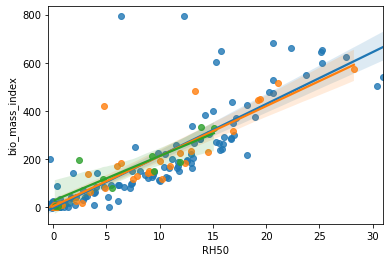

In [40]:
sns.regplot(data=L2_All_625, x='RH50', y='bio_mass_index')
sns.regplot(data=L2_All_25, x='RH50', y='bio_mass_index')
sns.regplot(data=L2_All_plot, x='RH50', y='bio_mass_index')

                    RH50  bio_mass_index
RH50            1.000000        0.858651
bio_mass_index  0.858651        1.000000
Final rmse value is = 246.98448100730553


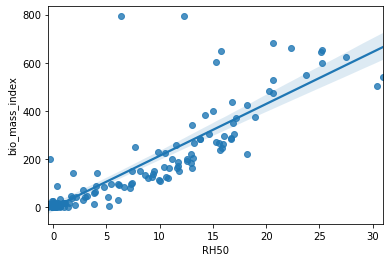

In [41]:
##Find RMSE ----https://www.includehelp.com/ml-ai/root-mean-square%20error-rmse.aspx

sns.regplot(data=L2_All_625, x='RH50', y='bio_mass_index')

#Correlation Coefficient 
foo = ['RH50','bio_mass_index']
x = L2_All_625[foo]
correlationsa = x.corr(method="pearson")
print(correlationsa)

###RMSE 
foo = ['RH50']
x = L2_All_625[foo]
x=  x.to_numpy()
foo = ['bio_mass_index']
y = L2_All_625[foo]
y= y.to_numpy()

rss=((x-y)**2).sum()
mse=np.mean((x-y)**2)
print("Final rmse value is =",np.sqrt(np.mean((x-y)**2)))

#combined rmse value
#rss=((y_test-y_pred)**2).sum()
#print("Final rmse value is =",np.sqrt(np.mean((y_test-y_pred)**2)))

                    RH50  bio_mass_index
RH50            1.000000        0.892878
bio_mass_index  0.892878        1.000000
Final rmse value is = 221.10997377767632


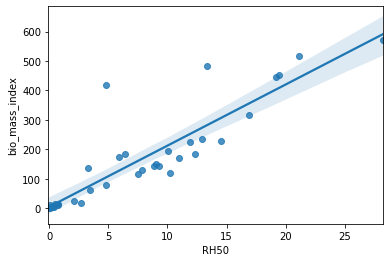

In [42]:
sns.regplot(data=L2_All_25, x='RH50', y='bio_mass_index')

#Correlation Coefficient 
foo = ['RH50','bio_mass_index']
x = L2_All_25[foo]
correlationsa = x.corr(method="pearson")
print (correlationsa)



###RMSE 
foo = ['RH50']
x = L2_All_25[foo]
x=  x.to_numpy()
foo = ['bio_mass_index']
y = L2_All_25[foo]
y= y.to_numpy()

rss=((x-y)**2).sum()
mse=np.mean((x-y)**2)
print("Final rmse value is =",np.sqrt(np.mean((x-y)**2)))

                    RH50  bio_mass_index
RH50            1.000000        0.874232
bio_mass_index  0.874232        1.000000
Final rmse value is = 187.35140653656848


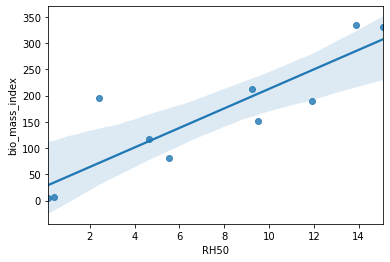

In [43]:
sns.regplot(data=L2_All_plot, x='RH50', y='bio_mass_index')

#Correlation Coefficient 
foo = ['RH50','bio_mass_index']
x = L2_All_plot[foo]
correlationsa = x.corr(method="pearson")
print (correlationsa)



###RMSE 
foo = ['RH50']
x = L2_All_plot[foo]
x=  x.to_numpy()
foo = ['bio_mass_index']
y = L2_All_plot[foo]
y= y.to_numpy()

rss=((x-y)**2).sum()
mse=np.mean((x-y)**2)
print("Final rmse value is =",np.sqrt(np.mean((x-y)**2)))

### Biomass index and AGBD 

<AxesSubplot:xlabel='bio_mass_index', ylabel='agbd'>

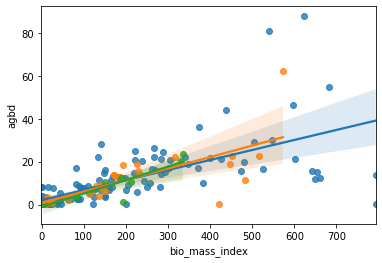

In [44]:


sns.regplot(data=L2_All_625, x="bio_mass_index", y="agbd")
sns.regplot(data=L2_All_25, x="bio_mass_index", y="agbd")
sns.regplot(data=L2_All_plot,x="bio_mass_index", y="agbd")


                bio_mass_index      agbd
bio_mass_index        1.000000  0.680707
agbd                  0.680707  1.000000
Final rmse value is = 243.96079623121702


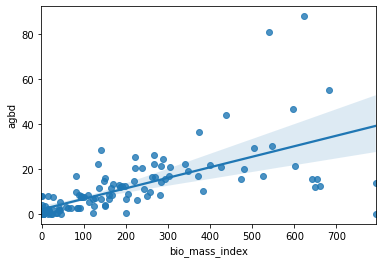

In [45]:
sns.regplot(data=L2_All_625, x="bio_mass_index", y="agbd")
#Correlation Coefficient 
foo = ['bio_mass_index','agbd']
x = L2_All_625[foo]
correlationsa = x.corr(method="pearson")
print(correlationsa)

###RMSE 
foo = ['bio_mass_index']
x = L2_All_625[foo]
x=  x.to_numpy()
foo = ['agbd']
y = L2_All_625[foo]
y= y.to_numpy()

rss=((x-y)**2).sum()
mse=np.mean((x-y)**2)
print("Final rmse value is =",np.sqrt(np.mean((x-y)**2)))

                bio_mass_index      agbd
bio_mass_index        1.000000  0.767685
agbd                  0.767685  1.000000
Final rmse value is = 218.1525349651803


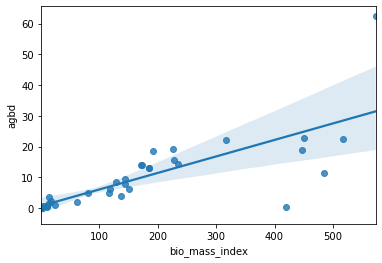

In [46]:
sns.regplot(data=L2_All_25, x="bio_mass_index", y="agbd")
foo = ['bio_mass_index','agbd']
x = L2_All_25[foo]
correlationsa = x.corr(method="pearson")
print(correlationsa)

###RMSE 
foo = ['bio_mass_index']
x = L2_All_25[foo]
x=  x.to_numpy()
foo = ['agbd']
y = L2_All_25[foo]
y= y.to_numpy()

rss=((x-y)**2).sum()
mse=np.mean((x-y)**2)
print("Final rmse value is =",np.sqrt(np.mean((x-y)**2)))

                bio_mass_index      agbd
bio_mass_index        1.000000  0.885765
agbd                  0.885765  1.000000
Final rmse value is = 184.58589958626567


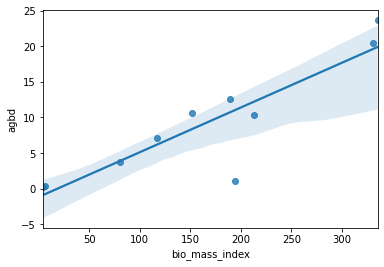

In [47]:
sns.regplot(data=L2_All_plot,x="bio_mass_index", y="agbd")
foo = ['bio_mass_index','agbd']
x = L2_All_plot[foo]
correlationsa = x.corr(method="pearson")
print(correlationsa)

###RMSE 
foo = ['bio_mass_index']
x = L2_All_plot[foo]
x=  x.to_numpy()
foo = ['agbd']
y = L2_All_plot[foo]
y= y.to_numpy()

rss=((x-y)**2).sum()
mse=np.mean((x-y)**2)
print("Final rmse value is =",np.sqrt(np.mean((x-y)**2)))

### RH50 and AGBD

<AxesSubplot:xlabel='RH50', ylabel='agbd'>

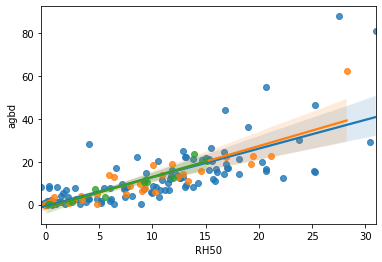

In [48]:
sns.regplot(data=L2_All_625, x="RH50", y="agbd")
sns.regplot(data=L2_All_25, x="RH50", y="agbd")
sns.regplot(data=L2_All_plot,x="RH50", y="agbd")

          RH50      agbd
RH50  1.000000  0.776216
agbd  0.776216  1.000000
Final rmse value is = 9.13050654097677


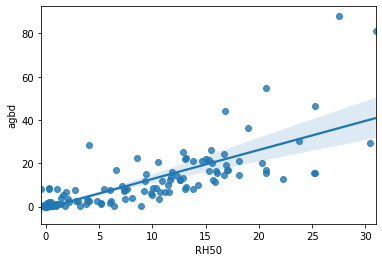

In [49]:

sns.regplot(data=L2_All_625, x="RH50", y="agbd")
#Correlation Coefficient 
foo = ['RH50','agbd']
x = L2_All_625[foo]
correlationsa = x.corr(method="pearson")
print(correlationsa)

###RMSE 
foo = ['RH50']
x = L2_All_625[foo]
x=  x.to_numpy()
foo = ['agbd']
y = L2_All_625[foo]
y= y.to_numpy()

rss=((x-y)**2).sum()
mse=np.mean((x-y)**2)
print("Final rmse value is =",np.sqrt(np.mean((x-y)**2)))





          RH50      agbd
RH50  1.000000  0.888195
agbd  0.888195  1.000000
Final rmse value is = 6.409272312966334


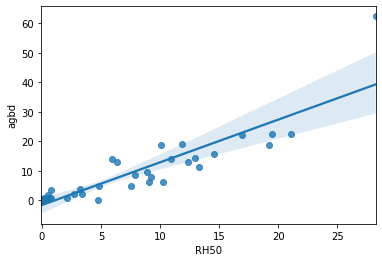

In [50]:
sns.regplot(data=L2_All_25, x="RH50", y="agbd")
#Correlation Coefficient 
foo = ['RH50','agbd']
x = L2_All_25[foo]
correlationsb = x.corr(method="pearson")
print(correlationsb)

###RMSE 
foo = ['RH50']
x = L2_All_25[foo]
x=  x.to_numpy()
foo = ['agbd']
y = L2_All_25[foo]
y= y.to_numpy()

rss=((x-y)**2).sum()
mse=np.mean((x-y)**2)
print("Final rmse value is =",np.sqrt(np.mean((x-y)**2)))

          RH50      agbd
RH50  1.000000  0.951569
agbd  0.951569  1.000000
Final rmse value is = 3.7273692221566166


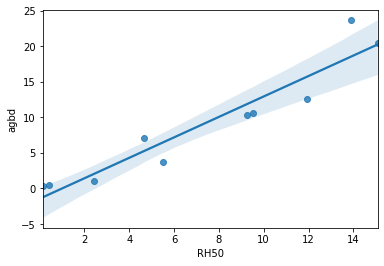

In [51]:

sns.regplot(data=L2_All_plot,x="RH50", y="agbd")
#Correlation Coefficient 
foo = ['RH50','agbd']
x = L2_All_plot[foo]
correlationsc = x.corr(method="pearson")
print(correlationsc)


###RMSE 
foo = ['RH50']
x = L2_All_plot[foo]
x=  x.to_numpy()
foo = ['agbd']
y = L2_All_plot[foo]
y= y.to_numpy()

rss=((x-y)**2).sum()
mse=np.mean((x-y)**2)
print("Final rmse value is =",np.sqrt(np.mean((x-y)**2)))

# LIDAR  MLR Regression Charts 

# Join Tree and LIDAR DATA 

### Subplot_625  Join 

In [52]:
subplot625 =  L2_All_625.set_index('ID_subplot625').join(trees_plot625.set_index('ID_subplot_0625'))
subplot25 =  L2_All_25.set_index('ID_subplot25').join(trees_plot25.set_index('ID_subplot25'))
plot_whole =  L2_All_plot.set_index('plot').join(trees_plot.set_index('plot'))

In [53]:
#Find coocoef 

<AxesSubplot:xlabel='bio_mass_index', ylabel='m_agb'>

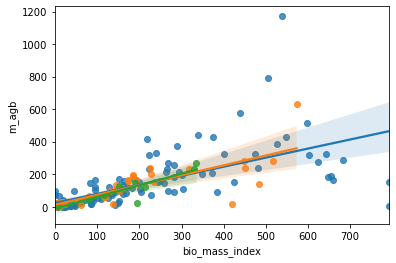

In [54]:
sns.regplot(data=subplot625, x="bio_mass_index", y="m_agb")
sns.regplot(data=subplot25,  x="bio_mass_index", y="m_agb")
sns.regplot(data=plot_whole, x="bio_mass_index", y="m_agb")

                bio_mass_index     m_agb
bio_mass_index        1.000000  0.669675
m_agb                 0.669675  1.000000
Final rmse value is = 159.82161761458204


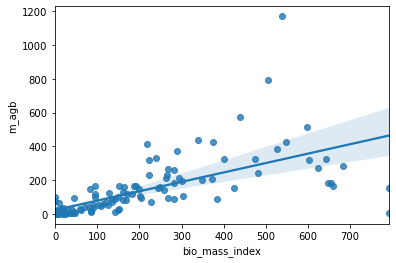

In [64]:
#Remove NAN
subplot625 =subplot625.dropna()
#Graph
sns.regplot(data=subplot625, x="bio_mass_index", y="m_agb")
#Correlation coefficents 
foo = ['bio_mass_index','m_agb']
x = subplot625[foo]
correlations = x.corr(method="pearson")
print(correlations)

###RMSE 
foo = ['bio_mass_index']
x = subplot625[foo]
x =  x.to_numpy()
foo = ['m_agb']
y = subplot625[foo]
y = y.to_numpy()

rss=((x-y)**2).sum()
mse=np.mean((x-y)**2)
print("Final rmse value is =",np.sqrt(np.mean((x-y)**2)))

                bio_mass_index     m_agb
bio_mass_index        1.000000  0.800319
m_agb                 0.800319  1.000000
Final rmse value is = 111.39720251544645


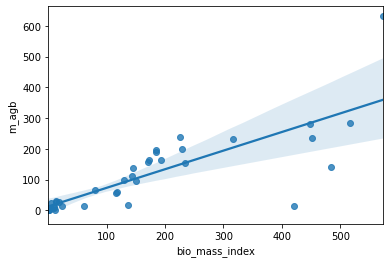

In [66]:
sns.regplot(data=subplot25,  x="bio_mass_index", y="m_agb")
#Correlation coefficents 
foo = ['bio_mass_index','m_agb']
x = subplot25[foo]
correlations = x.corr(method="pearson")
print(correlations)


###RMSE 
foo = ['bio_mass_index']
x = subplot25[foo]
x =  x.to_numpy()
foo = ['m_agb']
y = subplot25[foo]
y= y.to_numpy()

rss=((x-y)**2).sum()
mse=np.mean((x-y)**2)
print("Final rmse value is =",np.sqrt(np.mean((x-y)**2)))

                bio_mass_index     m_agb
bio_mass_index        1.000000  0.900042
m_agb                 0.900042  1.000000
Final rmse value is = 75.26348054657353


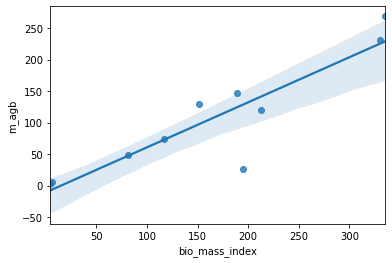

In [67]:
sns.regplot(data=plot_whole, x="bio_mass_index", y="m_agb")
#Correlation coefficents 
foo = ['bio_mass_index','m_agb']
x = plot_whole[foo]
correlations = x.corr(method="pearson")
print(correlations)

###RMSE 
foo = ['bio_mass_index']
x = plot_whole[foo]
x =  x.to_numpy()
foo = ['m_agb']
y = plot_whole[foo]
y= y.to_numpy()

rss=((x-y)**2).sum()
mse=np.mean((x-y)**2)
print("Final rmse value is =",np.sqrt(np.mean((x-y)**2)))


# Conclusion and Discussion 

In [ ]:
__Answer research question and give summary conclusions 

In [ ]:
Unexpected findings 

In [ ]:
Establish newness 

In [ ]:
Explain discrepancies 

In [ ]:
A Good Article is the one that is read and cited 